In [1]:
import pandas as pd
import datetime

In [2]:
file="pollution_us.csv"
#Empezamos con la limpieza de la informacion seleccionando las variables mas importantes
pullution_df = pd.read_csv(file)
print(pullution_df.columns.values)
pullution_df.head()

['Unnamed: 0' 'State Code' 'County Code' 'Site Num' 'Address' 'State'
 'County' 'City' 'Date Local' 'NO2 Units' 'NO2 Mean' 'NO2 1st Max Value'
 'NO2 1st Max Hour' 'NO2 AQI' 'O3 Units' 'O3 Mean' 'O3 1st Max Value'
 'O3 1st Max Hour' 'O3 AQI' 'SO2 Units' 'SO2 Mean' 'SO2 1st Max Value'
 'SO2 1st Max Hour' 'SO2 AQI' 'CO Units' 'CO Mean' 'CO 1st Max Value'
 'CO 1st Max Hour' 'CO AQI']


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
pullution_df=pullution_df[['State','City','Date Local','NO2 Mean','NO2 1st Max Value', 'O3 Units', 'O3 Mean', 'O3 1st Max Value', 'SO2 Units' ,'SO2 Mean', 'SO2 1st Max Value', 'CO Units' ,'CO Mean' ,'CO 1st Max Value']]

In [4]:
pullution_df.isnull().sum()

State                0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
CO Units             0
CO Mean              0
CO 1st Max Value     0
dtype: int64

In [5]:
pullution_df.describe()

,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06
mean,1.282193e+01,2.541485e+01,2.612485e-02,3.920331e-02,1.870364e+00,4.492185e+00,3.682177e-01,6.201067e-01
std,9.504814e+00,1.599963e+01,1.136974e-02,1.534362e-02,2.760435e+00,7.679866e+00,3.140231e-01,6.439361e-01
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,-4.375000e-01,-4.000000e-01
25%,5.750000e+00,1.300000e+01,1.787500e-02,2.900000e-02,2.565220e-01,8.000000e-01,1.834580e-01,2.920000e-01
50%,1.073913e+01,2.400000e+01,2.587500e-02,3.800000e-02,9.875000e-01,2.000000e+00,2.926250e-01,4.000000e-01
75%,1.771364e+01,3.570000e+01,3.391700e-02,4.800000e-02,2.325000e+00,5.000000e+00,4.666670e-01,8.000000e-01
max,1.395417e+02,2.670000e+02,9.508300e-02,1.410000e-01,3.216250e+02,3.510000e+02,7.508333e+00,1.990000e+01


In [6]:
pullution_df['Date Local'] = pd.to_datetime(pullution_df['Date Local'])
pullution_df['Year'] = pullution_df['Date Local'].map(lambda x: x.year)


In [7]:
groupstate=pullution_df[['State','City','NO2 Mean','NO2 1st Max Value','O3 Mean','O3 1st Max Value','SO2 Mean','SO2 1st Max Value','CO Mean','CO 1st Max Value','Year']].groupby(['Year','State']).mean()

In [8]:
groupstate.head(100)

NO2 Mean  NO2 1st Max Value   O3 Mean  \
Year State                                                          
2000 Arizona               26.487502          52.800228  0.023655   
     California            17.580989          31.667146  0.023675   
     Colorado              14.902469          34.597260  0.017066   
     District Of Columbia  22.725717          39.472527  0.017567   
     Florida               12.453038          27.078652  0.026261   
...                              ...                ...       ...   
2004 Missouri              13.870774          29.030233  0.025585   
     New Hampshire          9.768453          20.206522  0.026898   
     New Jersey            19.240872          33.912482  0.021934   
     New York              20.890264          35.182244  0.021117   
     North Carolina        10.630065          24.866029  0.030785   

                           O3 1st Max Value  SO2 Mean  SO2 1st Max Value  \
Year State                                                                 
2000 Arizona                       0.042858  2.303226           4.718629   
     California                    0.036492  1.721004           3.703067   
     Colorado                      0.032367  2.138058          11.808219   
     District Of Columbia          0.030893  8.137540          15.443132   
     Florida                       0.042879  1.973912           4.522472   
...                                     ...       ...                ...   
2004 Missouri                      0.041609  3.418997          11.749186   
     New Hampshire                 0.039701  2.356117           6.156522   
     New Jersey                    0.035534  5.605666          10.772956   
     New York                      0.032820  6.997805          13.883305   
     North Carolina                0.050299  2.369894          10.209689   

                            CO Mean  CO 1st Max Value  
Year State                                             
2000 Arizona               0.745756          1.687656  
     California            0.644488          1.196999  
     Colorado              0.611388          1.289315  
     District Of Columbia  1.175696          1.851648  
     Florida               0.725072          1.029354  
...                             ...               ...  
2004 Missouri              0.550480          0.833488  
     New Hampshire         0.256236          0.413043  
     New Jersey            0.518082          0.788235  
     New York              0.436545          0.676005  
     North Carolina        0.429905          0.629378  

[100 rows x 8 columns]

In [9]:
file2="fire_base.csv"
fire_df=pd.read_csv(file2)
fire_df.head()

C:\Users\user\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [10]:
fire_df.count()

OBJECTID                      1880465
FOD_ID                        1880465
FPA_ID                        1880465
SOURCE_SYSTEM_TYPE            1880465
SOURCE_SYSTEM                 1880465
NWCG_REPORTING_AGENCY         1880465
NWCG_REPORTING_UNIT_ID        1880465
NWCG_REPORTING_UNIT_NAME      1880465
SOURCE_REPORTING_UNIT         1880465
SOURCE_REPORTING_UNIT_NAME    1880465
LOCAL_FIRE_REPORT_ID           421179
LOCAL_INCIDENT_ID             1059644
FIRE_CODE                      324724
FIRE_NAME                      919986
ICS_209_INCIDENT_NUMBER         25717
ICS_209_NAME                    25717
MTBS_ID                         11003
MTBS_FIRE_NAME                  11003
COMPLEX_NAME                     5183
FIRE_YEAR                     1880465
DISCOVERY_DATE                1880465
DISCOVERY_DOY                 1880465
DISCOVERY_TIME                 997827
STAT_CAUSE_CODE               1880465
STAT_CAUSE_DESCR              1880465
CONT_DATE                      988934
CONT_DOY    

In [11]:
new_fire_df=fire_df[["FIRE_YEAR","STATE","OBJECTID"]].groupby(["FIRE_YEAR","STATE"]).count()
new_fire_df=new_fire_df.reset_index()
new_fire_df.head()

,FIRE_YEAR,STATE,OBJECTID
0,1992,AK,481
1,1992,AL,93
2,1992,AR,128
3,1992,AZ,3494
4,1992,CA,10833


In [12]:
file3="data.csv"
statescode=pd.read_csv(file3)
statescode.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [13]:
fire_df=pd.merge(new_fire_df,statescode,how = 'inner',left_on="STATE",right_on="Code")
fire_df=fire_df[["FIRE_YEAR","State","OBJECTID"]]

In [14]:
groupstate=groupstate.reset_index()
groupstate.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value
0,2000,Arizona,26.487502,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656
1,2000,California,17.580989,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999
2,2000,Colorado,14.902469,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315
3,2000,District Of Columbia,22.725717,39.472527,0.017567,0.030893,8.137540,15.443132,1.175696,1.851648
4,2000,Florida,12.453038,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354


In [15]:
groupstate["key"]=groupstate["Year"].map(str) + groupstate["State"]
fire_df["Key"]=fire_df["FIRE_YEAR"].map(str) + fire_df["State"]

In [16]:
newdata_states=pd.merge(groupstate,fire_df,how = 'inner',left_on="key",right_on="Key")

In [17]:
print(newdata_states.columns.values)
newdata_states=newdata_states[['Year','State_x', 'NO2 Mean','NO2 1st Max Value', 'O3 Mean', 'O3 1st Max Value','SO2 Mean', 'SO2 1st Max Value', 'CO Mean', 'CO 1st Max Value','OBJECTID']]
newdata_states.head()

['Year' 'State_x' 'NO2 Mean' 'NO2 1st Max Value' 'O3 Mean'
 'O3 1st Max Value' 'SO2 Mean' 'SO2 1st Max Value' 'CO Mean'
 'CO 1st Max Value' 'key' 'FIRE_YEAR' 'State_y' 'OBJECTID' 'Key']


,Year,State_x,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,OBJECTID
0,2000,Arizona,26.487502,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859
1,2000,California,17.580989,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977
2,2000,Colorado,14.902469,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619
3,2000,Florida,12.453038,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499
4,2000,Illinois,26.437457,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29


In [18]:
newdata_states=newdata_states.rename(columns={"State_x": "State", "OBJECTID": "Wildfires"})

In [19]:
newdata_states.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires
0,2000,Arizona,26.487502,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859
1,2000,California,17.580989,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977
2,2000,Colorado,14.902469,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619
3,2000,Florida,12.453038,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499
4,2000,Illinois,26.437457,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29


In [20]:
file4 = "population.csv"
population = pd.read_csv(file4)
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,Alabama,4779736,4780125,4785437,4799069,4815588,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,40,4,9,2,Alaska,710231,710249,713910,722128,730443,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
2,40,4,8,4,Arizona,6392017,6392288,6407172,6472643,6554978,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
3,40,3,7,5,Arkansas,2915918,2916031,2921964,2940667,2952164,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
4,40,4,9,6,California,37253956,37254519,37319502,37638369,37948800,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [21]:
population_g=population[["NAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016"]]
population_g=population_g.rename(columns={"POPESTIMATE2010": "2010",
                                              "POPESTIMATE2011": "2011",
                                              "POPESTIMATE2012": "2012",
                                              "POPESTIMATE2013": "2013",
                                              "POPESTIMATE2014": "2014",
                                              "POPESTIMATE2015": "2015",
                                              "POPESTIMATE2016": "2016",
                                             })
population_g.head()

,NAME,2010,2011,2012,2013,2014,2015,2016
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525
1,Alaska,713910,722128,730443,737068,736283,737498,741456
2,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072
3,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918
4,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117


In [22]:
population_append=pd.melt(population_g,id_vars=["NAME"], value_vars=['2010', '2011','2012','2013','2014','2015','2016'])
population_append

,NAME,variable,value
0,Alabama,2010,4785437
1,Alaska,2010,713910
2,Arizona,2010,6407172
3,Arkansas,2010,2921964
4,California,2010,37319502
...,...,...,...
359,Washington,2016,7294771
360,West Virginia,2016,1831023
361,Wisconsin,2016,5772628
362,Wyoming,2016,584215


In [23]:
population_append["Key"]=population_append["variable"].map(str) + population_append["NAME"]
population_append.head()

,NAME,variable,value,Key
0,Alabama,2010,4785437,2010Alabama
1,Alaska,2010,713910,2010Alaska
2,Arizona,2010,6407172,2010Arizona
3,Arkansas,2010,2921964,2010Arkansas
4,California,2010,37319502,2010California


In [24]:
newdata_states["Key"]=newdata_states["Year"].map(str) + newdata_states["State"]
newdata_states.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,Key
0,2000,Arizona,26.487502,52.800228,0.023655,0.042858,2.303226,4.718629,0.745756,1.687656,3859,2000Arizona
1,2000,California,17.580989,31.667146,0.023675,0.036492,1.721004,3.703067,0.644488,1.196999,6977,2000California
2,2000,Colorado,14.902469,34.597260,0.017066,0.032367,2.138058,11.808219,0.611388,1.289315,1619,2000Colorado
3,2000,Florida,12.453038,27.078652,0.026261,0.042879,1.973912,4.522472,0.725072,1.029354,6499,2000Florida
4,2000,Illinois,26.437457,44.416193,0.017105,0.028007,6.064269,15.464915,0.702893,1.112642,29,2000Illinois


In [25]:
data_df=pd.merge(newdata_states,population_append,how = 'inner',left_on="Key",right_on="Key")
data_df.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,Key,NAME,variable,value
0,2010,Arizona,15.916712,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,2010Arizona,Arizona,2010,6407172
1,2010,Arkansas,10.004749,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2010Arkansas,Arkansas,2010,2921964
2,2010,California,12.247269,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,2010California,California,2010,37319502
3,2010,Colorado,16.171138,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,2010Colorado,Colorado,2010,5047349
4,2010,Connecticut,9.739028,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,2010Connecticut,Connecticut,2010,3579114


In [26]:
print(data_df.columns.values)
data_df=data_df[['Year','State','NO2 Mean','NO2 1st Max Value','O3 Mean','O3 1st Max Value','SO2 Mean','SO2 1st Max Value','CO Mean','CO 1st Max Value','Wildfires','value']]
data_df=data_df.rename(columns={"value": "population"})
data_df.head()

['Year' 'State' 'NO2 Mean' 'NO2 1st Max Value' 'O3 Mean'
 'O3 1st Max Value' 'SO2 Mean' 'SO2 1st Max Value' 'CO Mean'
 'CO 1st Max Value' 'Wildfires' 'Key' 'NAME' 'variable' 'value']


,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,population
0,2010,Arizona,15.916712,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,6407172
1,2010,Arkansas,10.004749,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2921964
2,2010,California,12.247269,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,37319502
3,2010,Colorado,16.171138,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,5047349
4,2010,Connecticut,9.739028,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,3579114


In [27]:
data_df["N_wildfire"] = (data_df["Wildfires"] - data_df["Wildfires"].mean()) / (data_df["Wildfires"].max() - data_df["Wildfires"].min())

data_df["N_population"] = (data_df["population"] - data_df["population"].mean()) / (data_df["population"].max() - data_df["population"].min())
data_df.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,population,N_wildfire,N_population
0,2010,Arizona,15.916712,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,6407172,-0.004629,-0.025927
1,2010,Arkansas,10.004749,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2921964,0.026372,-0.116804
2,2010,California,12.247269,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,37319502,0.209190,0.780116
3,2010,Colorado,16.171138,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,5047349,0.050741,-0.061384
4,2010,Connecticut,9.739028,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,3579114,-0.066271,-0.099669


In [28]:
import matplotlib.pyplot as plt

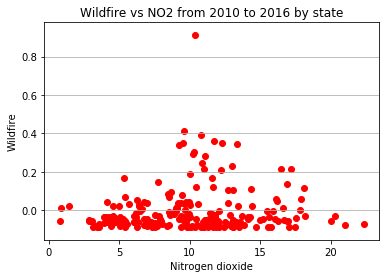

In [29]:
plt.scatter(data_df["NO2 Mean"],data_df["N_wildfire"], color = "red")
plt.title("Wildfire vs NO2 from 2010 to 2016 by state")
plt.ylabel("Wildfire")
plt.xlabel("Nitrogen dioxide")
plt.grid(True,axis='y')
plt.show() 

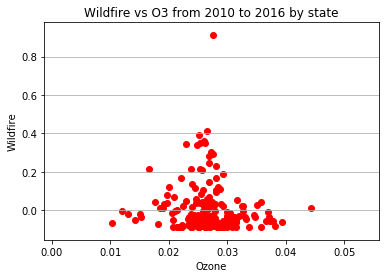

In [30]:
#data_df.to_csv('Project_data.csv')
plt.scatter(data_df["O3 Mean"],data_df["N_wildfire"],color = "red")
plt.title("Wildfire vs O3 from 2010 to 2016 by state")
plt.ylabel("Wildfire")
plt.xlabel("Ozone")
plt.grid(True,axis='y')
plt.show() 


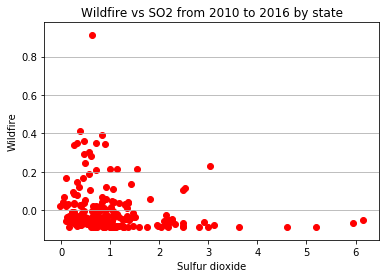

In [31]:
plt.scatter(data_df["SO2 Mean"],data_df["N_wildfire"],color = "red")
plt.title("Wildfire vs SO2 from 2010 to 2016 by state")
plt.ylabel("Wildfire")
plt.xlabel("Sulfur dioxide")
plt.grid(True,axis='y')
plt.show() 

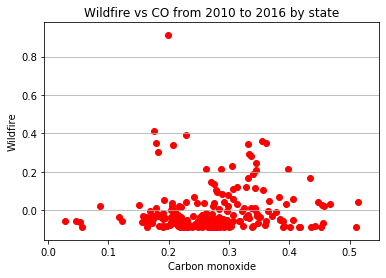

In [32]:
plt.scatter(data_df["CO Mean"],data_df["N_wildfire"],color = "red")
plt.title("Wildfire vs CO from 2010 to 2016 by state")
plt.ylabel("Wildfire")
plt.xlabel("Carbon monoxide")
plt.grid(True,axis='y')
plt.show() 

-Ploting population

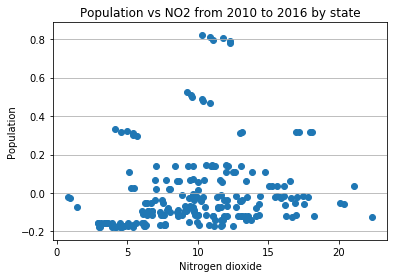

In [33]:
plt.scatter(data_df["NO2 Mean"],data_df["N_population"])
plt.title("Population vs NO2 from 2010 to 2016 by state")
plt.ylabel("Population")
plt.xlabel("Nitrogen dioxide")
plt.grid(True,axis='y')
plt.show() 

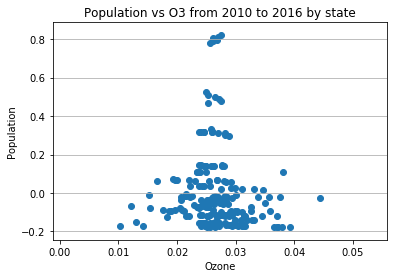

In [34]:
plt.scatter(data_df["O3 Mean"],data_df["N_population"])
plt.title("Population vs O3 from 2010 to 2016 by state")
plt.ylabel("Population")
plt.xlabel("Ozone")
plt.grid(True,axis='y')
plt.show()

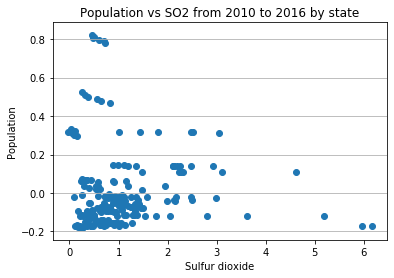

In [35]:
plt.scatter(data_df["SO2 Mean"],data_df["N_population"])
plt.title("Population vs SO2 from 2010 to 2016 by state")
plt.ylabel("Population")
plt.xlabel("Sulfur dioxide")
plt.grid(True,axis='y')
plt.show()

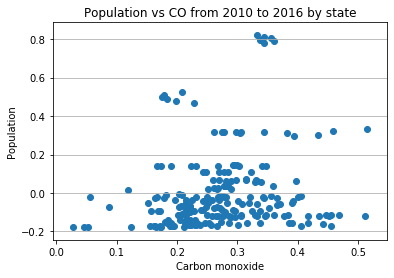

In [36]:
plt.scatter(data_df["CO Mean"],data_df["N_population"])
plt.title("Population vs CO from 2010 to 2016 by state")
plt.ylabel("Population")
plt.xlabel("Carbon monoxide")
plt.grid(True,axis='y')
plt.show()

In [52]:
from scipy.stats import linregress
from scipy import stats
def reg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    yvalue=y.min()+10
    plt.annotate(line_eq,xy=(1,1),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show

The r-squared is: 0.18207693367286176


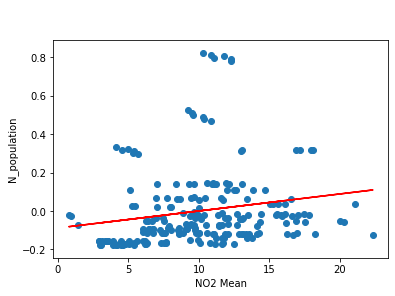

In [53]:
reg_plot(data_df["NO2 Mean"],data_df["N_population"])

In [54]:
#data_df['bin_population'] = pd.cut(data_df['population'], bins=[567299,4828493,9089687,13350881‬,17612075,21873269,26134463,30395657,34656851,38918045])
data_df['bin'] = pd.cut(data_df['population'], bins=[567299,4828493,9089687,13350881,17612075,21873269,26134463,30395657,34656851,38918045],labels=['1','2','3','4','5','6','7','8','9'])
data_df.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,population,N_wildfire,N_population,bin,bin_wildfire
0,2010,Arizona,15.916712,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,6407172,-0.004629,-0.025927,2,1
1,2010,Arkansas,10.004749,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2921964,0.026372,-0.116804,1,2
2,2010,California,12.247269,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,37319502,0.209190,0.780116,9,3
3,2010,Colorado,16.171138,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,5047349,0.050741,-0.061384,2,2
4,2010,Connecticut,9.739028,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,3579114,-0.066271,-0.099669,1,1


In [55]:
data_reg=data_df[['bin','NO2 Mean','O3 Mean','SO2 Mean','CO Mean']].groupby(['bin']).mean()
data_reg=data_reg.reset_index()
data_reg=data_reg.dropna()
data_reg.head()

,bin,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,1,8.631945,0.027014,0.913478,0.261079
1,2,11.958948,0.026719,1.087079,0.267905
2,3,10.715660,0.025043,1.456108,0.284159
4,5,10.520471,0.026060,1.058785,0.353982
5,6,10.504911,0.026656,0.675779,0.203018


The r-squared is: -0.6876072170658999


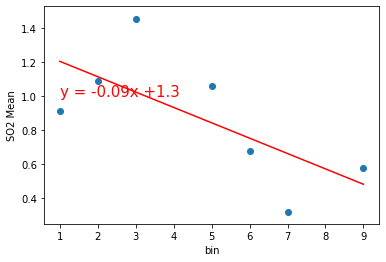

In [56]:
reg_plot(data_reg['bin'].astype(int),data_reg['SO2 Mean'])

In [57]:
print(data_df['Wildfires'].min())
print(data_df['Wildfires'].max())

2
19453


In [58]:
data_df['bin_wildfire'] = pd.cut(data_df['Wildfires'], bins=[2,2163,4324,6485,8646,10807,12968,15129,17290,19451],labels=['1','2','3','4','5','6','7','8','9'])
data_df.head()

,Year,State,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Wildfires,population,N_wildfire,N_population,bin,bin_wildfire
0,2010,Arizona,15.916712,33.981276,0.025903,0.043353,1.047033,1.999018,0.365168,0.697395,1617,6407172,-0.004629,-0.025927,2,1
1,2010,Arkansas,10.004749,23.138889,0.027650,0.041337,1.292494,2.168403,0.454634,0.605972,2220,2921964,0.026372,-0.116804,1,2
2,2010,California,12.247269,23.389085,0.025669,0.037684,0.720866,1.467768,0.344747,0.572430,5776,37319502,0.209190,0.780116,9,3
3,2010,Colorado,16.171138,33.061321,0.022955,0.037774,1.028090,4.286439,0.365696,0.685613,2694,5047349,0.050741,-0.061384,2,2
4,2010,Connecticut,9.739028,21.720350,0.027474,0.039643,0.949623,2.499313,0.279957,0.400370,418,3579114,-0.066271,-0.099669,1,1


In [59]:
data_reg_wild=data_df[['bin_wildfire','NO2 Mean','O3 Mean','SO2 Mean','CO Mean']].groupby(['bin_wildfire']).mean()
data_reg_wild=data_reg_wild.reset_index()
data_reg_wild=data_reg_wild.dropna()
data_reg_wild.head()

,bin_wildfire,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,1,9.733832,0.026896,1.088435,0.259609
1,2,10.542877,0.025983,0.832335,0.313865
2,3,12.153599,0.024978,1.032663,0.324214
3,4,10.873974,0.025984,0.537549,0.284405
4,5,10.719003,0.025928,0.563640,0.252919


The r-squared is: -0.8297322898201891


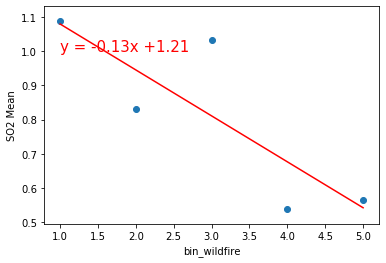

In [60]:
reg_plot(data_reg_wild['bin_wildfire'].astype(int),data_reg_wild['SO2 Mean'])